# Graded Assignment 1 Python For DS

### Learning objective: 
<span style="font-size:16px;">1. Working with data using python libraries.<br/>
2. Data Visualization<br/>
3. Exploratory Data Analysis and Data Preprocessing
</span>

### Context:
<span style="font-size:16px;">A new football club named ‘GL United FC’ has just been inaugurated. This club
does not have a team yet. The team is looking to hire players for their roster.
Management wants to make such decisions using a data based approach.
During a recent hiring drive, you were selected for the Data Science team as a
data scientist. Your team has been tasked with creating a report which
recommends players for the main team. To start with, a total of 15 players are
required. Player data for all teams has been acquired from FIFA. This data
contains information about the players, the clubs they are currently playing for
and various performance measures. The team needs 20 possible players to
choose from. You have been requested to do the analysis and formulate a
report in order to help the management make a decision regarding potential
players.
</span>

### Dataset Description:
<span style="font-size:16px;">The data contains details for over 18,000 players playing in various football
clubs in Europe. It contains information on age, skill rating, wages and player
value, etc.
</span>

### Dataset:
<span style="font-size:16px;">The files provided are as follows:
</span>

__fifa.csv –__ data file.

__fifa_ variable_information.csv -__ information on individual variables.

## Load and explore data 

### 1.) Import the required libraries and read the dataset.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
# Set the option to view all the columns in the DataFrame
pd.set_option('display.max_columns', None)

In [3]:
# Loading the datasets
fifa_df = pd.read_csv('fifa.csv')
fifa_var_df =pd.read_csv('fifa_ variable_information.csv')

### 2.) Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
# First few samples from the data.
fifa_df.head(6)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M


In [5]:
# First few samples from the data.
fifa_var_df.head(6)

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating


In [6]:
# Checking the shape
fifa_df.shape

(18207, 60)

- It indicates there are 18207 rows and 60 columns.

In [7]:
# Checking the shape
fifa_var_df.shape

(59, 2)

- It indicates there are 59 rows and 2 columns.

In [8]:
# Now checking the basic information of the data
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [9]:
fifa_var_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          59 non-null     object
 1   unique id for every player  59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [10]:
# Get statistical summary for the fifa_df and transpose it for better readability.
fifa_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,45.550911,19.525820,2.0,30.0,49.0,62.0,95.0


In [11]:
# Get statistical summary for the fifa_var_df and transpose it for better readability.
fifa_var_df.describe().T

,count,unique,top,freq
ID,59,59,Loaned From,1
unique id for every player,59,25,rating on scale of 100,33


In [12]:
# Check for missing values (null values)
fifa_df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [13]:
# Check for the Percentage of null values in a specific column of the dataset.
fifa_df.isnull().sum()/len(fifa_df) * 100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing   

#### Inference:
1. Majority of the columns have either no missing values or a low percentage of missing values (<1%), indicating relatively complete data.
2. Some columns have a moderate percentage of missing values (around 1-9%), suggesting a notable portion of missing data.
3. One column, 'Loaned From', stands out with a high percentage of missing values (93%), indicating significant missing data.

In [14]:
## Checking the data for the duplicate records.
len(fifa_df[fifa_df.duplicated()])

0

#### Inference:
- The dataset contains no duplicate records, indicating that each entry is unique. This suggests that there are no identical player profiles or instances of data duplication within the dataset.

### 3.) Drop the columns which you think redundant for the analysis.

In [15]:
# Check for the Columns in the dataset
fifa_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [16]:
fifa_df[['Photo','Flag','Club Logo','Body Type','Jersey Number','Loaned From']].head(3)

,Photo,Flag,Club Logo,Body Type,Jersey Number,Loaned From
0,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/flags/52.png,https://cdn.sofifa.org/teams/2/light/241.png,Messi,10.0,NaN
1,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/flags/38.png,https://cdn.sofifa.org/teams/2/light/45.png,C. Ronaldo,7.0,NaN
2,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/flags/54.png,https://cdn.sofifa.org/teams/2/light/73.png,Neymar,10.0,NaN


In [17]:
fifa_df.drop(['Photo','Flag','Club Logo','Body Type', 'Jersey Number', 'Loaned From'],axis=1,inplace=True)
fifa_df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,RF,"Jul 1, 2004",2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,ST,"Jul 10, 2018",2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,LW,"Aug 3, 2017",2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,GK,"Jul 1, 2011",2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,RCM,"Aug 30, 2015",2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Note:
- Dropping columns that are redundant for our analysis.
- These columns may not provide significant insights or are not necessary for our current analysis.

- Dropping 'Photo', 'Flag', and 'Club Logo' columns as they are graphical representations and not relevant for our analysis.
- 'Body Type' column might not be relevant for the analysis as it pertains to physical attributes of players.
- 'Jersey Number' might not be relevant for analysis if it's not a significant factor in our study.

- Dropping the 'Loaned From' column because it has null values for around 93% of records, making it unreliable for analysis.
- This column may not add value to our analysis due to the high percentage of missing values.


In [18]:
fifa_df.shape

(18207, 54)

- After removing the unwanted columns, the shape of the dataframe is now 18207 rows and 54 columns.
- This indicates that we have 18207 records (players) and 54 attributes/features remaining in our dataset.

## Data Cleaning and Preprocessing 

### 4.) Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix. 

In [19]:
# Checking some samples of the 'Value', 'Wage', 'Release Clause' columns
fifa_df[['Value','Wage','Release Clause']].head(6)

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
3,€72M,€260K,€138.6M
4,€102M,€355K,€196.4M
5,€93M,€340K,€172.1M


In [20]:
# Replacing '€' as '' in the column 'Value', 'Wage', 'Release Clause'.
fifa_df['Value'] = fifa_df['Value'].str.replace('€','')
fifa_df['Wage'] = fifa_df['Wage'].str.replace('€','')
fifa_df['Release Clause'] = fifa_df['Release Clause'].str.replace('€','')

##### Note: 
- When the record/entry has "M"(indicates millions) as suffix,  multiplying that value with 1000000.
- When the record/entry has "K"(indicates thousands) as suffix, multiplying that value with 1000.

In [21]:
# Function to convert values with 'K' representing thousands and 'M' representing millions
def convert_value(value):
    numeric_part = value.replace(r'[KM]+$', '', regex=True).astype(float)
    multiplier = value.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'],[10**3,10**6]).astype(float)
    return numeric_part * multiplier

# Converting 'Value', 'Wage', and 'Release Clause' columns using the defined function
fifa_df['Value'] = convert_value(fifa_df['Value'])
fifa_df['Wage'] = convert_value(fifa_df['Wage'])
fifa_df['Release Clause'] = convert_value(fifa_df['Release Clause'])


In [22]:
# Checking some samples of the 'Value', 'Wage', 'Release Clause' columns after conversion
fifa_df[['Value','Wage','Release Clause']].head(6)

,Value,Wage,Release Clause
0,110500000.0,565000.0,226500000.0
1,77000000.0,405000.0,127100000.0
2,118500000.0,290000.0,228100000.0
3,72000000.0,260000.0,138600000.0
4,102000000.0,355000.0,196400000.0
5,93000000.0,340000.0,172100000.0


### 5.) Convert the column "Joined" into integer data type with keeping only the year.

In [23]:
# Checking for the values in 'Joined' column
fifa_df['Joined'].unique()

array(['Jul 1, 2004', 'Jul 10, 2018', 'Aug 3, 2017', ..., 'May 22, 2017',
       'Nov 6, 2016', 'Nov 27, 2018'], dtype=object)

In [24]:
# Convert the 'Joined' column to datetime type and extract the year
fifa_df['Joined'] = pd.to_datetime(fifa_df['Joined']).dt.year

In [25]:
# Checking for the values in 'Joined' column after conversion
fifa_df['Joined'].unique()

array([2004., 2018., 2017., 2011., 2015., 2012., 2014., 2005., 2010.,
       2016., 2008., 2013.,   nan, 2007., 2009., 2002., 2003., 2006.,
       2001., 1991., 1998., 2000., 1999.])

In [26]:
# Fill NaN values with 0 and convert the 'Joined' column to integer type
fifa_df['Joined'] = fifa_df['Joined'].fillna(0).astype(int)

In [27]:
# Checking the unique values in the 'Joined' column after converting it to integer and filling missing values with 0
fifa_df['Joined'].unique()

array([2004, 2018, 2017, 2011, 2015, 2012, 2014, 2005, 2010, 2016, 2008,
       2013,    0, 2007, 2009, 2002, 2003, 2006, 2001, 1991, 1998, 2000,
       1999])

In [28]:
print("The datatype of 'Joined' column:", fifa_df['Joined'].dtype)

The datatype of 'Joined' column: int32


- The datatype of 'Joined' column is successfully converted to integer datatype.

### 6.) Convert the column "Contract Valid Until" to pandas datetime type.

In [29]:
# Checking for the values in 'Contract Valid Until' column
fifa_df['Contract Valid Until'].unique()

array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', nan, 'May 31, 2020',
       'Jun 30, 2020', 'May 31, 2019', 'Dec 31, 2019', 'Jan 1, 2019',
       'Jun 1, 2019', 'Jan 4, 2019', 'Jan 31, 2019', 'Jan 7, 2019',
       'Jan 2, 2019', 'Jan 6, 2019', 'Oct 14, 2019', 'Jan 3, 2019',
       'May 4, 2019', 'Jan 12, 2019', 'Jan 25, 2019', 'Jan 18, 2019',
       'Dec 1, 2019', 'Nov 30, 2018', 'Feb 27, 2020', 'Jan 5, 2019',
       'Jan 15, 2019', 'Jan 30, 2019', 'Jan 11, 2019', 'Jan 20, 2019'],
      dtype=object)

In [30]:
# Convert the 'Contract Valid Until' column to pandas datetime type with handling of errors
fifa_df['Contract Valid Until'] = pd.to_datetime(fifa_df['Contract Valid Until'], errors='coerce')

In [31]:
#Displaying some samples of the column after conversion
fifa_df[['Name','Contract Valid Until']].sample(5)

,Name,Contract Valid Until
7945,Choi Sung Keun,2019-01-01
5037,A. Faurlín,2019-01-01
13556,Lee Hyun Woong,2022-01-01
15931,R. Isomura,2021-01-01
3709,C. Fassnacht,2019-01-01


In [32]:
# Displaying the dtype of the 'Contract Valid Until' column after conversion
print('The Datatype of column "Contract Valid Until" is - ', fifa_df['Contract Valid Until'].dtype)

The Datatype of column "Contract Valid Until" is -  datetime64[ns]


- The datatype of 'Contract Valid Until' column is successfully converted to datetime datatype.

### 7.) The column 'Height' is in inches with a quotation mark, Convert to float with decimal points.

In [33]:
# Checking some samples from the 'Height' column and dtype.
fifa_df['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [34]:
print("datatype of 'Height':", fifa_df['Height'].dtype)

datatype of 'Height': object


In [35]:
# Splitting the 'Height' column by single quote (') and expanding it into separate columns
# Then, concatenating the first and second columns with a decimal point (.) to convert the height to a float format
fifa_df['Height'] = fifa_df['Height'].str.split("'", expand=True)[0] + '.' + fifa_df['Height'].str.split("'", expand=True)[1]

# Converting the 'Height' column to numeric type
# This converts the string representation of heights to numerical values
fifa_df['Height'] = pd.to_numeric(fifa_df['Height'])

# Rename the 'Height' column to 'Height (in inches)' for better understanding the dataset
fifa_df.rename(columns={'Height': 'Height (in inches)'}, inplace=True)

In [36]:
# Checking some samples from the 'Height' column and dtype after conversion
fifa_df[['Name', 'Height (in inches)']].head()

,Name,Height (in inches)
0,L. Messi,5.70
1,Cristiano Ronaldo,6.20
2,Neymar Jr,5.90
3,De Gea,6.40
4,K. De Bruyne,5.11


In [37]:
print("The datatype of 'Height (in inches)':", fifa_df['Height (in inches)'].dtype)

The datatype of 'Height (in inches)': float64


- The datatype of 'Height' column is successfully converted to float datatype.

### 8.) The column "Weight" has the suffix as lbs, remove the suffix and convert to float

In [38]:
# Checking some samples from the 'Weight' column and dtype before conversion
fifa_df['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [39]:
print("datatype of 'Weight':", fifa_df['Weight'].dtype)

datatype of 'Weight': object


In [40]:
## replace the lbs to ''  and convert the value to float type
fifa_df['Weight']=fifa_df['Weight'].str.replace('lbs','').astype(float)

# Rename the 'Weight' column to 'Weight (in lbs)' for better understanding the dataset
fifa_df.rename(columns={'Weight': 'Weight (in lbs)'}, inplace=True)

In [41]:
# Checking some samples from the 'Weight' column and dtype after conversion
fifa_df[['Name', 'Weight (in lbs)']].head()

,Name,Weight (in lbs)
0,L. Messi,159.0
1,Cristiano Ronaldo,183.0
2,Neymar Jr,150.0
3,De Gea,168.0
4,K. De Bruyne,154.0


In [42]:
print("The datatype of 'Weight (in lbs)' column:", fifa_df['Weight (in lbs)'].dtype)

The datatype of 'Weight (in lbs)' column: float64


- The datatype of 'Weight' column is successfully converted to float datatype.

### 9.) Check for the percentage of missing values and impute them with appropriate imputation techniques.

In [43]:
# Calculating the percentage of missing values for each column in the fifa_df.
fifa_df.isnull().sum()/len(fifa_df) * 100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Position                    0.329544
Joined                      0.000000
Contract Valid Until        1.587302
Height (in inches)          0.263635
Weight (in lbs)             0.263635
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
Curve                       0.263635
FKAccuracy                  0.263635
L


- Most columns have very low percentages of missing values, ranging from 0% to around 1-2%.
- Some columns have slightly higher percentages of missing values, such as 'Contract Valid Until' and 'Release Clause', with around 1.5-8.5% missing values.
- Columns like 'Preferred Foot', 'International Reputation', and various skill attributes have a consistent percentage of missing values around 0.26%.

#### 1. For very low missing values percentage ranging from 0 to 1% dropping the rows with missing values.

In [44]:
# Compute the percentage of missing values
missing_values = fifa_df.isnull().sum() / len(fifa_df)

# Defining the threshold for dropping rows
threshold = 0.01

# Filter columns with missing values less than 1%
low_missing_columns = missing_values[missing_values < threshold].index

# Drop rows with missing values in columns with low missing values
fifa_df.dropna(subset=low_missing_columns, inplace=True)

- Since the 'Contract Valid Until' column is of type datetime, we should handle missing values differently.
- We cannot use the mode or median for datetime columns. 
- Instead, we can choose to drop rows with missing values for this column as the percentage of missing values is low.

In [45]:
# Separate datetime columns
datetime_columns = fifa_df.select_dtypes(include=['datetime64']).columns

# Drop rows with missing values in datetime columns
fifa_df.dropna(subset=datetime_columns, inplace=True)

#### 2. For other columns we can use Mean/Median/Mode imputations.

In [46]:
# Separating numerical and categorical columns with missing values
numerical_columns = missing_values[missing_values > 0].index[fifa_df.dtypes[missing_values > 0] != 'object']
categorical_columns = missing_values[missing_values > 0].index[fifa_df.dtypes[missing_values > 0] == 'object']

# Fill missing values for numerical columns with median
fifa_df[numerical_columns] = fifa_df[numerical_columns].fillna(fifa_df[numerical_columns].median())

# Fill missing values for categorical columns with mode
fifa_df[categorical_columns] = fifa_df[categorical_columns].fillna(fifa_df[categorical_columns].mode().iloc[0])

In [47]:
# Calculating the percentage of missing values for each column in the fifa_df after imputation.
fifa_df.isnull().sum()/len(fifa_df) * 100

ID                          0.0
Name                        0.0
Age                         0.0
Nationality                 0.0
Overall                     0.0
Potential                   0.0
Club                        0.0
Value                       0.0
Wage                        0.0
Preferred Foot              0.0
International Reputation    0.0
Weak Foot                   0.0
Skill Moves                 0.0
Work Rate                   0.0
Position                    0.0
Joined                      0.0
Contract Valid Until        0.0
Height (in inches)          0.0
Weight (in lbs)             0.0
Crossing                    0.0
Finishing                   0.0
HeadingAccuracy             0.0
ShortPassing                0.0
Volleys                     0.0
Dribbling                   0.0
Curve                       0.0
FKAccuracy                  0.0
LongPassing                 0.0
BallControl                 0.0
Acceleration                0.0
SprintSpeed                 0.0
Agility 

#### Inference:
- After preprocessing the dataset, all missing values have been handled appropriately.
- No columns are left with missing values, indicating a thorough cleaning process.
- The dataset is now ready for further analysis and modeling without concerns about missing data.

## Exploratory Data Analysis

### 10.) Plot the distribution of Overall rating for all the players and write your findings.

In [48]:
fifa_df['Overall'].unique()

array([94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46],
      dtype=int64)

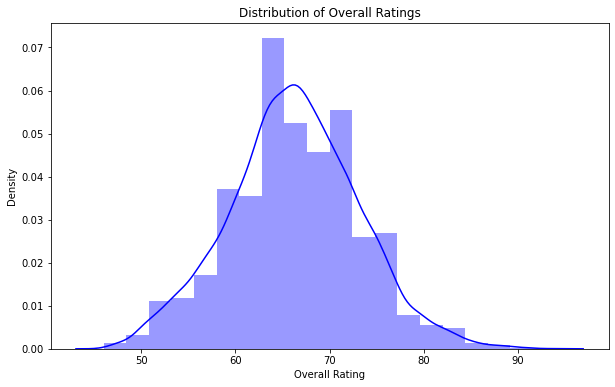

In [49]:
# Plotting the distribution of Overall ratings using distplot
plt.figure(figsize=(10, 6))
sns.distplot(fifa_df['Overall'], bins=20, color='blue', kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Density')
plt.grid(False)
plt.show()

#### Inference:
1. The distribution plot illustrates that the overall ratings of players span a range from approximately 46 to 94. The ratings are clustered primarily between 60 and 70, indicating that a significant number of players fall within this range.
2. The minimum overall rating observed is 46, while the maximum is 94, showcasing the breadth of ratings among players in the dataset.
3. The peak of the distribution occurs around a rating of 66, suggesting that this rating is the most frequent among the players included in the dataset.
4. Additionally, the distribution plot reveals the presence of potential outliers on the higher end of the rating scale, as evidenced by the relatively long tail extending beyond the bulk of the distribution. These outliers represent players with exceptionally high ratings compared to the majority of the dataset.

- This analysis highlights the central tendency of player ratings, the range of ratings present, and the potential presence of outliers in the dataset.

### 11.) Retrieve the names of top20 players based on the Overall rating.

In [50]:
# Sort the DataFrame by 'Overall' rating in descending order and select the top 20 players.
Top_20_names = fifa_df[['Name','Overall']].sort_values(by = 'Overall', ascending = False).head(20).reset_index()

# Display the DataFrame containing the top 20 players along with their overall ratings.
Top_20_names

,index,Name,Overall
0,0,L. Messi,94
1,1,Cristiano Ronaldo,94
2,2,Neymar Jr,92
3,3,De Gea,91
4,4,K. De Bruyne,91
5,5,E. Hazard,91
6,6,L. Modrić,91
7,7,L. Suárez,91
8,8,Sergio Ramos,91
9,12,D. Godín,90


### 12.) Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating.

In [51]:
"""
Filter the fifa_df to include only rows where the 'Name' column matches with the 'Name' column in the Top_20_names DataFrame 
and where the 'Overall' column matches with the 'Overall' column in the Top_20_names DataFrame.
"""

fifa_df_top20 = fifa_df[(fifa_df['Name'].isin(Top_20_names['Name'])) & 
                        (fifa_df['Overall'].isin(Top_20_names['Overall']))].reset_index(drop=True)

# Displaying the filtered DataFrame containing all the information of the top 20 players based on 'Overall' ratings.
fifa_df_top20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height (in inches),Weight (in lbs),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,RF,2004,2021-01-01,5.70,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,ST,2018,2022-01-01,6.20,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,LW,2017,2022-01-01,5.90,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,2011,2020-01-01,6.40,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,RCM,2015,2023-01-01,5.11,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,High/ Medium,LF,2012,2020-01-01,5.80,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,4.0,High/ High,RCM,2012,2020-01-01,5.80,146.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,5.0,4.0,3.0,High/ Medium,RS,2014,2021-01-01,6.00,190.0,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,3.0,High/ Medium,RCB,2005,2020-01-01,6.00,181.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,Right,3.0,3.0,1.0,Medium/ Medium,GK,2014,2021-01-01,6.20,192.0,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0


In [52]:
fifa_df_top20.shape

(20, 54)

### 13.) What is the average "Age" and "Wage" of these top 20 players?

In [53]:
# Calculate the average age of the top 20 players
average_age = fifa_df_top20['Age'].mean()

# Calculate the average wage of the top 20 players
average_wage = fifa_df_top20['Wage'].mean()

print("Average Age of the top 20 players:", average_age, "Years")
print("Average Wage of the top 20 players: €" + str(average_wage))

Average Age of the top 20 players: 29.55 Years
Average Wage of the top 20 players: €294950.0


### 14.) Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage.

In [54]:
# Filter the fifa_df_top20 DataFrame to include only rows where the 'Wage' column is equal to the maximum wage among the top 20 players.
# And Selecting the columns 'Name' and 'Wage' for the filtered rows.

fifa_df_top20[fifa_df_top20['Wage']==fifa_df_top20['Wage'].max()][['Name','Wage']]

,Name,Wage
0,L. Messi,565000.0


### 15.) Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'.

In [55]:
# Generating the DataFrame
selected_columns = ['Name', 'Club', 'Wage', 'Overall']
players_club_data = fifa_df[selected_columns]
players_club_data.head()

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94
2,Neymar Jr,Paris Saint-Germain,290000.0,92
3,De Gea,Manchester United,260000.0,91
4,K. De Bruyne,Manchester City,355000.0,91


####  i) find the average Overall rating for each club.

In [56]:
# Calculating the average Overall rating for each club
average_overall_ratings = players_club_data.groupby('Club')['Overall'].mean().reset_index()
print(average_overall_ratings[['Club', 'Overall']])

                      Club    Overall
0      SSV Jahn Regensburg  65.586207
1    1. FC Heidenheim 1846  65.750000
2     1. FC Kaiserslautern  63.384615
3               1. FC Köln  70.785714
4          1. FC Magdeburg  65.615385
..                     ...        ...
646     Zagłębie Sosnowiec  60.760000
647        Çaykur Rizespor  66.900000
648              Örebro SK  60.481481
649          Östersunds FK  63.545455
650          Śląsk Wrocław  62.208333

[651 rows x 2 columns]


####  ii) Display the average overall rating of Top10 Clubs using a plot


In [57]:
# Sort the DataFrame by 'Overall' column in descending order to find the clubs with the highest average overall ratings
# Select the top 10 clubs with the highest average overall ratings
top10_clubs = average_overall_ratings.sort_values(by='Overall', ascending=False).head(10)

# Display the DataFrame containing the top 10 clubs along with their average overall ratings
top10_clubs

,Club,Overall
326,Juventus,82.280000
398,Napoli,80.000000
315,Inter,79.750000
470,Real Madrid,78.242424
382,Milan,78.074074
212,FC Barcelona,78.030303
435,Paris Saint-Germain,77.433333
482,Roma,77.423077
375,Manchester United,77.242424
214,FC Bayern München,77.000000


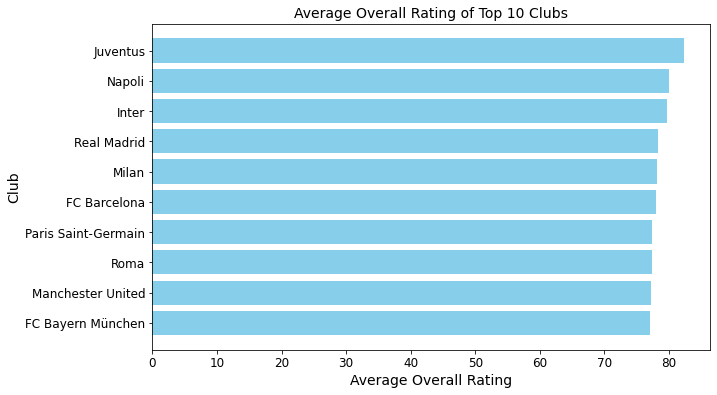

In [58]:
# Plot for the average overall rating of the top 10 clubs using a horizontal bar plot.
plt.figure(figsize=(10, 6))
plt.barh(top10_clubs['Club'], top10_clubs['Overall'], color='skyblue')
plt.xlabel('Average Overall Rating', fontsize=14)
plt.ylabel('Club', fontsize=14)
plt.title('Average Overall Rating of Top 10 Clubs', fontsize=14)

# Invert y-axis to display the highest-rated club at the top.
plt.gca().invert_yaxis()

# Setting font size for x-axis and y-axis tick labels for better readability.
plt.xticks(fontsize=12)   
plt.yticks(fontsize=12)
plt.show()

#### Note: 
A horizontal bar plot is chosen for its clarity in comparing the average overall ratings of the top 10 clubs. 
With club names on the y-axis and their respective ratings on the x-axis, this plot facilitates easy identification of the highest-rated clubs at a glance, enhancing visual comprehension.

### 16.) What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same.

In [59]:
corr_AP = fifa_df[['Age', 'Potential']].corr()
corr_AP

,Age,Potential
Age,1.000000,-0.252799
Potential,-0.252799,1.000000


<AxesSubplot:>

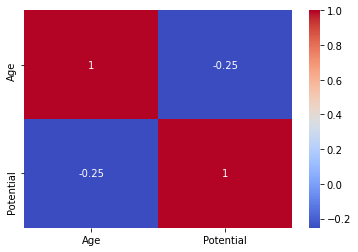

In [60]:
sns.heatmap(corr_AP, annot=True, cmap='coolwarm')

#### Inference:
- The relationship between the 'Age' and the 'Potential' of the player is **Inversely Proportional.**
- A correlation coefficient of -0.25 suggests a weak negative linear relationship between 'Age' and 'Potential'.
- This means that as a player's age increases, there is a tendency for their potential to decrease slightly, but the relationship is not very strong.
- It indicates that while younger players tend to have higher potential on average, there are many other factors besides age that influence a player's potential.

- Therefore, Age alone is not a strong predictor of a player's potential, and other factors such as skill development, training, and playing time, Physical attributes etc. may play significant roles.

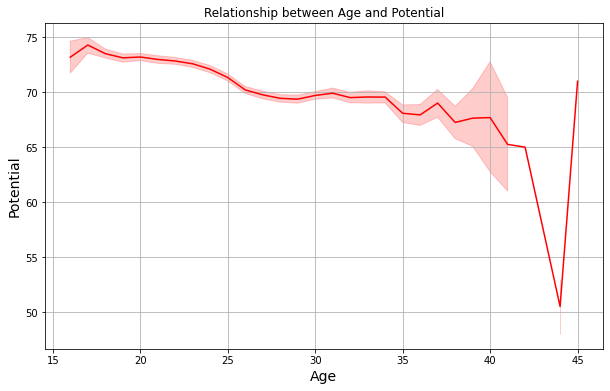

In [61]:
# Creating a line plot to visualize the relationship between age and potential.
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Potential', data=fifa_df, color='red')
plt.title('Relationship between Age and Potential')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Potential', fontsize=14)
plt.grid(True)
plt.show()

#### Inference:
- The seaborn line plot shows that younger players tend to have higher potential, while older players exhibit a slight decline in potential.
- We observe that players exhibit an average peak potential at the age of 17. After reaching this peak, potential gradually decreases and remains relatively stable until around the age of 35. After that there is a steep decline in the 'Player’s Potential'.
- This suggests that age is a factor in determining a player's potential, with younger players typically being more promising.
- However, there is variability within each age group, indicating that other factors also influence potential, such as Skill Moves, Preferred Foot, Physical attributes, Technical Skills etc.

### 17.) Which features directly contribute to the wages of the players? Support your answer with a plot and a metric. (hint: use Potential, Overall, Value, International reputation, and Release Clause)

In [62]:
# Selecting relevant features
relevant_features = ['Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']

# Calculate correlation coefficients
corr_matrix = fifa_df[relevant_features + ['Wage']].corr()

# Select correlation of 'Wage' with relevant features
wage_corr = corr_matrix[['Wage']].sort_values(by='Wage', ascending=False)

# Display correlation coefficients
print("Correlation coefficients of relevant features with player wages:")
print(wage_corr)

Correlation coefficients of relevant features with player wages:
                              Wage
Wage                      1.000000
Value                     0.858030
Release Clause            0.822907
International Reputation  0.670736
Overall                   0.575940
Potential                 0.488999


- This indicates a positive correlation between player wages and these features. 
- Players with higher Value, Release Clause, International Reputation, Overall ratings, and Potentials tend to command higher wages. 
- Among these features, **Value and Release Clause** show the strongest correlation with Wage.

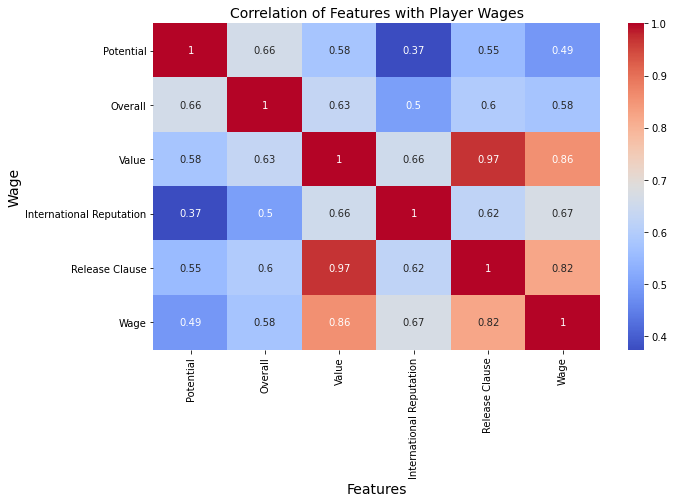

In [63]:
# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Player Wages', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Wage', fontsize=14)
plt.show()

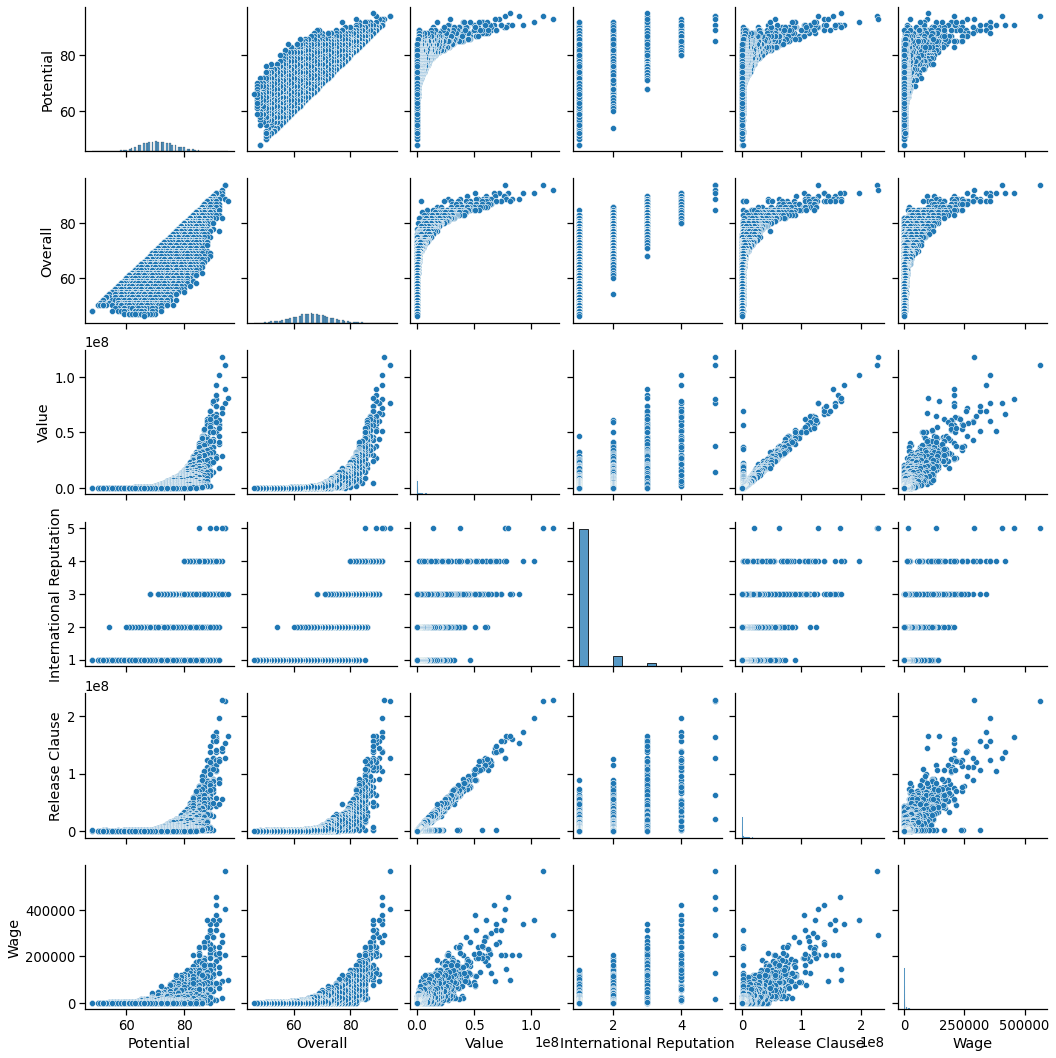

In [64]:
# Creating pairplot
# Set the font scale
sns.set_context("notebook", font_scale=1.2)
sns.pairplot(fifa_df[relevant_features + ['Wage']])
plt.show()

#### Inference:
- The heatmap and pairplot illustrate strong positive correlations between the 'Wage' column and other key attributes such as 'Potential', 'Overall', 'Value', 'International Reputation', and 'Release Clause'.
- These correlations suggest that as these attributes increase, there tends to be a corresponding increase in player wages.
- **Value and Release Clause** exhibit the most robust correlation with Wage, indicating that players with higher Value and Release Clauses tend to earn higher salaries.

### 18.) Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot.

In [65]:
# Finding the position with the maximum number of players
print("Position with maximum number of players:")
fifa_df['Position'].value_counts().sort_values(ascending=False).head(1).reset_index().rename(
    columns={'index': 'Position', 'Position': 'No. of Players'})

Position with maximum number of players:


,Position,No. of Players
0,ST,2130


In [66]:
# Finding the position with the minimum number of players
print("Position with minimum number of players:")
fifa_df['Position'].value_counts().sort_values(ascending=True).head(1).reset_index().rename(
    columns={'index': 'Position', 'Position': 'No. of Players'})

Position with minimum number of players:


,Position,No. of Players
0,LF,15


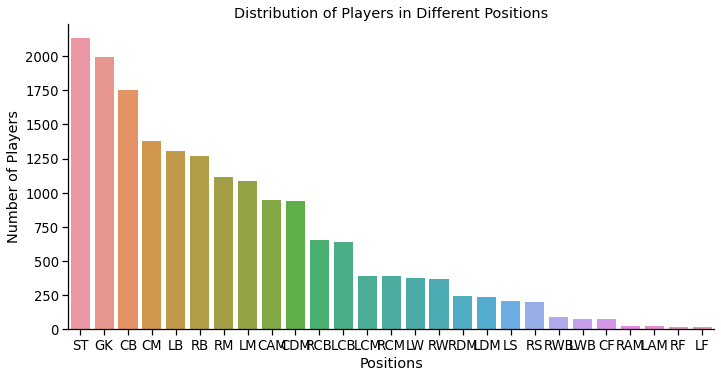

In [67]:
# Creating a categorical plot (catplot) to visualize the distribution of player positions
sns.catplot(data=fifa_df, x="Position", kind="count", aspect=2, order=fifa_df['Position'].value_counts().index)

# Adding labels and title
plt.xlabel("Positions")
plt.ylabel("Number of Players")
plt.title("Distribution of Players in Different Positions")

plt.show()

#### Inference:
- The catplot illustrates that the majority of players in the dataset occupy the 'ST' (Striker) position, with 2130 players recorded in this role.
- Conversely, the 'LF' (Left Forward) position has the fewest players, with only 15 individuals playing in this position.

### 19.) How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players

In [68]:
# Filtering the DataFrame to include players from the club 'Juventus' and with a wage greater than 200K
juventus_high_wage = fifa_df[(fifa_df['Club'] == 'Juventus') & (fifa_df['Wage'] > 200000)].reset_index(drop=True)

# Display all information of the players meeting the criteria
juventus_high_wage

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Joined,Contract Valid Until,Height (in inches),Weight (in lbs),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,ST,2018,2022-01-01,6.2,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
1,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,3.0,3.0,4.0,High/ Medium,LF,2015,2022-01-01,5.1,165.0,82.0,84.0,68.0,87.0,88.0,92.0,88.0,88.0,75.0,92.0,87.0,83.0,91.0,86.0,85.0,82.0,75.0,80.0,65.0,88.0,48.0,32.0,84.0,87.0,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
2,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,4.0,3.0,2.0,Medium/ High,LCB,2005,2020-01-01,6.2,187.0,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,63.0,75.0,54.0,82.0,55.0,78.0,89.0,65.0,89.0,49.0,92.0,88.0,28.0,50.0,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


- As we can see, there are 3 players from the club 'Juventus' with the 'Wage' greater than 200K.

### 20.) Generate a data frame containing top 5 players by Overall rating for each unique position.

In [69]:
# Grouping the DataFrame by 'Position', sorting each group by 'Overall' rating, 
#and selecting top 5 players for each position.
top5_players_df = fifa_df.groupby(['Position']).apply(lambda x : x.sort_values('Overall',ascending=False).head(5))

# Displaying some samples from the resulting DataFrame
top5_players_df.head(15)

ID             Name  Age         Nationality  Overall  \
Position                                                                  
CAM      17   194765     A. Griezmann   27              France       89   
         31   190460       C. Eriksen   26             Denmark       88   
         61   201942  Roberto Firmino   26              Brazil       86   
         66   189596        T. Müller   28             Germany       86   
         74   176635          M. Özil   29             Germany       86   
CB       12   182493         D. Godín   32             Uruguay       90   
         42   205600        S. Umtiti   24              France       87   
         73   177509       M. Benatia   31             Morocco       86   
         89   192366      N. Otamendi   30           Argentina       85   
         102  171919            Naldo   35              Brazil       85   
CDM      20   189511  Sergio Busquets   29               Spain       89   
         27   200145         Casemiro   26              Brazil       88   
         72   180206        M. Pjanić   28  Bosnia Herzegovina       86   
         75   135507      Fernandinho   33              Brazil       86   
         118  209499          Fabinho   24              Brazil       84   

              Potential               Club       Value      Wage  \
Position                                                           
CAM      17          90    Atlético Madrid  78000000.0  145000.0   
         31          91  Tottenham Hotspur  73500000.0  205000.0   
         61          87          Liverpool  53000000.0  195000.0   
         66          86  FC Bayern München  45000000.0  135000.0   
         74          86            Arsenal  43500000.0  190000.0   
CB       12          90    Atlético Madrid  44000000.0  125000.0   
         42          92       FC Barcelona  57000000.0  205000.0   
         73          86           Juventus  30000000.0  160000.0   
         89          85    Manchester City  28500000.0  170000.0   
         102         85      FC Schalke 04   9000000.0   38000.0   
CDM      20          89       FC Barcelona  51500000.0  315000.0   
         27          90        Real Madrid  59500000.0  285000.0   
         72          86           Juventus  44000000.0  180000.0   
         75          86    Manchester City  18000000.0  185000.0   
         118         88          Liverpool  34000000.0  120000.0   

             Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
Position                                                                        
CAM      17            Left                       4.0        3.0          4.0   
         31           Right                       3.0        5.0          4.0   
         61           Right                       3.0        4.0          4.0   
         66           Right                       4.0        4.0          3.0   
         74            Left                       4.0        2.0          4.0   
CB       12           Right                       3.0        3.0          2.0   
         42            Left                       3.0        3.0          2.0   
         73           Right                       3.0        3.0          2.0   
         89           Right                       3.0        3.0          2.0   
         102          Right                       3.0        4.0          2.0   
CDM      20           Right                       4.0        3.0          3.0   
         27           Right                       3.0        3.0          2.0   
         72           Right                       3.0        4.0          3.0   
         75           Right                       3.0        4.0          3.0   
         118          Right                       3.0        2.0          3.0   

                   Work Rate Position  Joined Contract Valid Until  \
Position                                                             
CAM      17       High/ High      CAM    2014           2023-01-01 

### 21.) What is the average wage one can expect to pay for the top 5 players in every position?

In [70]:
# Calculate the average wage for each position
average_wage_by_position = top5_players_df['Wage'].groupby(top5_players_df['Position']).mean()
average_wage_by_position.name = 'Avg Wage'

# Display the average wage for each position
average_wage_by_position

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Avg Wage, dtype: float64

📝 Assignment Completed by **Shrikant Verma** 🚀
## Happy Learning !!!